In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
btc_data = pd.read_csv("BTCUSDT-1m-2024-01-25.csv")

In [3]:
btc_data

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1706140800000,40078.8,40080.0,40046.6,40051.1,198.159,1706140859999,7.938653e+06,2145,34.959,1.400615e+06,0
1,1706140860000,40051.3,40074.7,40041.9,40063.2,197.646,1706140919999,7.917135e+06,2001,62.773,2.514396e+06,0
2,1706140920000,40063.2,40073.9,40041.1,40044.4,373.332,1706140979999,1.495239e+07,2608,61.530,2.464349e+06,0
3,1706140980000,40044.3,40060.0,40044.3,40059.9,58.147,1706141039999,2.329070e+06,1053,28.913,1.158056e+06,0
4,1706141040000,40060.0,40066.1,40053.6,40066.1,59.896,1706141099999,2.399450e+06,1197,33.404,1.338163e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1706226900000,39936.0,39937.0,39936.0,39937.0,13.702,1706226959999,5.472106e+05,214,1.707,6.817113e+04,0
1436,1706226960000,39937.0,39942.3,39936.9,39942.2,18.297,1706227019999,7.307600e+05,279,13.231,5.284194e+05,0
1437,1706227020000,39942.3,39953.1,39942.2,39953.1,25.297,1706227079999,1.010574e+06,500,20.360,8.133428e+05,0
1438,1706227080000,39953.0,39953.1,39931.4,39931.5,25.028,1706227139999,9.996865e+05,552,3.711,1.482344e+05,0


In [4]:
import datetime

# Convert timestamps to datetime for 'open_time' and 'close_time'
btc_data['open_time'] = pd.to_datetime(btc_data['open_time'], unit='ms')
btc_data['close_time'] = pd.to_datetime(btc_data['close_time'], unit='ms')

# Display the data types and the first few rows to confirm the changes
btc_data.dtypes, btc_data.head()

(open_time                 datetime64[ns]
 open                             float64
 high                             float64
 low                              float64
 close                            float64
 volume                           float64
 close_time                datetime64[ns]
 quote_volume                     float64
 count                              int64
 taker_buy_volume                 float64
 taker_buy_quote_volume           float64
 ignore                             int64
 dtype: object,
             open_time     open     high      low    close   volume  \
 0 2024-01-25 00:00:00  40078.8  40080.0  40046.6  40051.1  198.159   
 1 2024-01-25 00:01:00  40051.3  40074.7  40041.9  40063.2  197.646   
 2 2024-01-25 00:02:00  40063.2  40073.9  40041.1  40044.4  373.332   
 3 2024-01-25 00:03:00  40044.3  40060.0  40044.3  40059.9   58.147   
 4 2024-01-25 00:04:00  40060.0  40066.1  40053.6  40066.1   59.896   
 
                close_time  quote_volume  count  tak

/var/folders/c7/gry26dmj3y1f00dnw7wrthjm0000gn/T/ipykernel_4812/78163269.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)


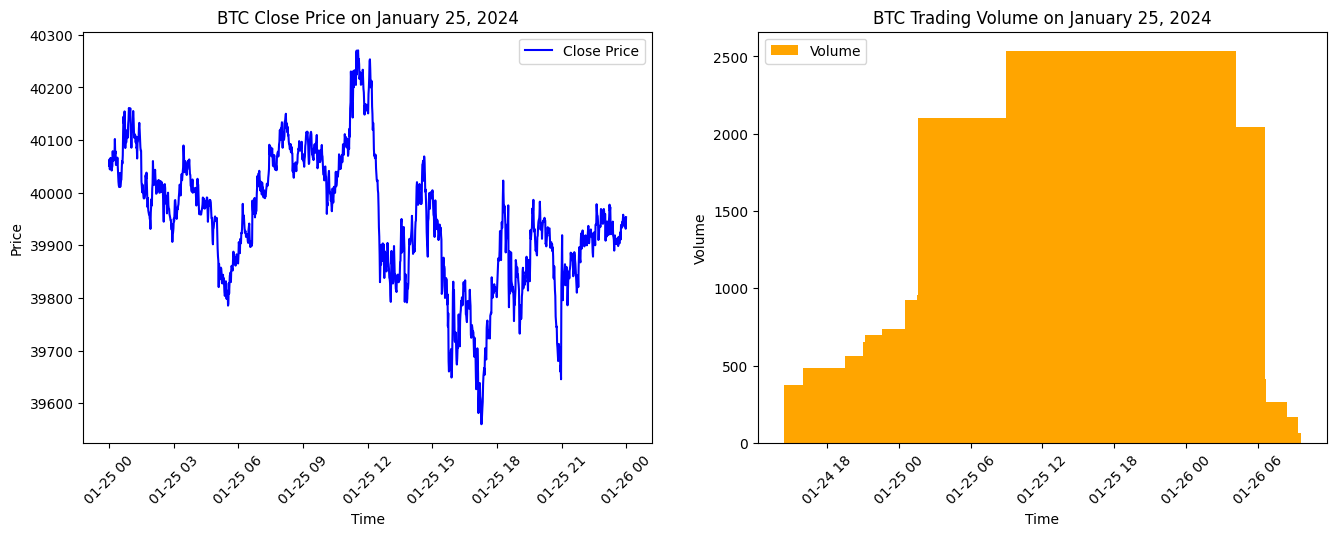

In [5]:
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(14, 6))

# Plot closing price
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.plot(btc_data['open_time'], btc_data['close'], label='Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('BTC Close Price on January 25, 2024')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.legend()

# Plot volume
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.bar(btc_data['open_time'], btc_data['volume'], label='Volume', color='orange')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('BTC Trading Volume on January 25, 2024')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.legend()

plt.show()


In [6]:
del btc_data["ignore"]

In [7]:
btc_data.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2024-01-25 00:00:00,40078.8,40080.0,40046.6,40051.1,198.159,2024-01-25 00:00:59.999,7.938653e+06,2145,34.959,1.400615e+06
1,2024-01-25 00:01:00,40051.3,40074.7,40041.9,40063.2,197.646,2024-01-25 00:01:59.999,7.917135e+06,2001,62.773,2.514396e+06
2,2024-01-25 00:02:00,40063.2,40073.9,40041.1,40044.4,373.332,2024-01-25 00:02:59.999,1.495239e+07,2608,61.530,2.464349e+06
3,2024-01-25 00:03:00,40044.3,40060.0,40044.3,40059.9,58.147,2024-01-25 00:03:59.999,2.329070e+06,1053,28.913,1.158056e+06
4,2024-01-25 00:04:00,40060.0,40066.1,40053.6,40066.1,59.896,2024-01-25 00:04:59.999,2.399450e+06,1197,33.404,1.338163e+06


In [8]:
#Setup target 
btc_data["future"] = btc_data["close"].shift(-1)
del btc_data["close_time"]

In [9]:
btc_data

,open_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,future
0,2024-01-25 00:00:00,40078.8,40080.0,40046.6,40051.1,198.159,7.938653e+06,2145,34.959,1.400615e+06,40063.2
1,2024-01-25 00:01:00,40051.3,40074.7,40041.9,40063.2,197.646,7.917135e+06,2001,62.773,2.514396e+06,40044.4
2,2024-01-25 00:02:00,40063.2,40073.9,40041.1,40044.4,373.332,1.495239e+07,2608,61.530,2.464349e+06,40059.9
3,2024-01-25 00:03:00,40044.3,40060.0,40044.3,40059.9,58.147,2.329070e+06,1053,28.913,1.158056e+06,40066.1
4,2024-01-25 00:04:00,40060.0,40066.1,40053.6,40066.1,59.896,2.399450e+06,1197,33.404,1.338163e+06,40055.1
...,...,...,...,...,...,...,...,...,...,...,...
1435,2024-01-25 23:55:00,39936.0,39937.0,39936.0,39937.0,13.702,5.472106e+05,214,1.707,6.817113e+04,39942.2
1436,2024-01-25 23:56:00,39937.0,39942.3,39936.9,39942.2,18.297,7.307600e+05,279,13.231,5.284194e+05,39953.1
1437,2024-01-25 23:57:00,39942.3,39953.1,39942.2,39953.1,25.297,1.010574e+06,500,20.360,8.133428e+05,39931.5
1438,2024-01-25 23:58:00,39953.0,39953.1,39931.4,39931.5,25.028,9.996865e+05,552,3.711,1.482344e+05,39953.3


In [10]:
btc_data["Target"] = (btc_data["future"] > btc_data["close"]).astype(int)

In [11]:
btc_data.head()

,open_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,future,Target
0,2024-01-25 00:00:00,40078.8,40080.0,40046.6,40051.1,198.159,7.938653e+06,2145,34.959,1.400615e+06,40063.2,1
1,2024-01-25 00:01:00,40051.3,40074.7,40041.9,40063.2,197.646,7.917135e+06,2001,62.773,2.514396e+06,40044.4,0
2,2024-01-25 00:02:00,40063.2,40073.9,40041.1,40044.4,373.332,1.495239e+07,2608,61.530,2.464349e+06,40059.9,1
3,2024-01-25 00:03:00,40044.3,40060.0,40044.3,40059.9,58.147,2.329070e+06,1053,28.913,1.158056e+06,40066.1,1
4,2024-01-25 00:04:00,40060.0,40066.1,40053.6,40066.1,59.896,2.399450e+06,1197,33.404,1.338163e+06,40055.1,0


In [12]:
#Making opentime as index 
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   open_time               1440 non-null   datetime64[ns]
 1   open                    1440 non-null   float64       
 2   high                    1440 non-null   float64       
 3   low                     1440 non-null   float64       
 4   close                   1440 non-null   float64       
 5   volume                  1440 non-null   float64       
 6   quote_volume            1440 non-null   float64       
 7   count                   1440 non-null   int64         
 8   taker_buy_volume        1440 non-null   float64       
 9   taker_buy_quote_volume  1440 non-null   float64       
 10  future                  1439 non-null   float64       
 11  Target                  1440 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memor

In [13]:
btc_data.set_index("open_time")

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,future,Target
open_time,,,,,,,,,,,
2024-01-25 00:00:00,40078.8,40080.0,40046.6,40051.1,198.159,7.938653e+06,2145,34.959,1.400615e+06,40063.2,1
2024-01-25 00:01:00,40051.3,40074.7,40041.9,40063.2,197.646,7.917135e+06,2001,62.773,2.514396e+06,40044.4,0
2024-01-25 00:02:00,40063.2,40073.9,40041.1,40044.4,373.332,1.495239e+07,2608,61.530,2.464349e+06,40059.9,1
2024-01-25 00:03:00,40044.3,40060.0,40044.3,40059.9,58.147,2.329070e+06,1053,28.913,1.158056e+06,40066.1,1
2024-01-25 00:04:00,40060.0,40066.1,40053.6,40066.1,59.896,2.399450e+06,1197,33.404,1.338163e+06,40055.1,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25 23:55:00,39936.0,39937.0,39936.0,39937.0,13.702,5.472106e+05,214,1.707,6.817113e+04,39942.2,1
2024-01-25 23:56:00,39937.0,39942.3,39936.9,39942.2,18.297,7.307600e+05,279,13.231,5.284194e+05,39953.1,1
2024-01-25 23:57:00,39942.3,39953.1,39942.2,39953.1,25.297,1.010574e+06,500,20.360,8.133428e+05,39931.5,0


In [14]:
#RFC
model = RandomForestClassifier(n_estimators=200,min_samples_split=100,random_state=1)

In [15]:
#Train test data
train = btc_data.iloc[:-100]
test = btc_data.iloc[-100:]

In [16]:
predictors = ["open", "high", "low", "close", "volume"]

In [17]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [18]:
preds = model.predict(test[predictors])


In [19]:
preds = pd.Series(preds,index=test.index)


In [20]:
from sklearn.metrics import  precision_score

precision_score(test["Target"],preds)


0.46153846153846156

In [21]:
combined = pd.concat([test["Target"],preds],axis=1)


<Axes: >

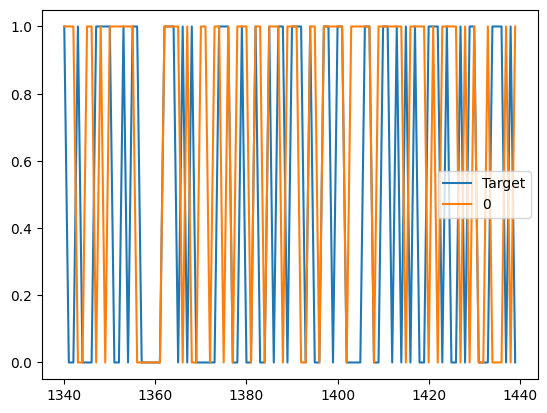

In [22]:
combined.plot()


In [23]:
#Building a backtesting system 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [24]:
def backtest(data, model, predictors, start = 250 , step = 30):
    all_predictions = []
    
    for i in range (start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [25]:
predictions = backtest(btc_data, model, predictors)


In [26]:
predictions["Predictions"].value_counts()


Predictions
1    670
0    520
Name: count, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5059701492537313

In [28]:
predictions["Target"].value_counts()/predictions.shape[0]


Target
1    0.50084
0    0.49916
Name: count, dtype: float64

In [29]:
horizons = [2, 5, 60]
new_predictors = []

for horizon in horizons:
    # Calculate rolling average for the 'Close' column only
    rolling_averages = btc_data['close'].rolling(window=horizon).mean()
    
    # Calculate the ratio of 'Close' to its rolling average
    ratio_column = f"Close_Ratio_{horizon}"
    btc_data[ratio_column] = btc_data['close'] / rolling_averages
    
    # Calculate the rolling sum of 'Target' shifted by one period
    trend_column = f"Trend_{horizon}"
    btc_data[trend_column] = btc_data['Target'].shift(1).rolling(window=horizon).sum()
    
    # Add the new column names to the list of predictors
    new_predictors.extend([ratio_column, trend_column])


In [30]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   open_time               1440 non-null   datetime64[ns]
 1   open                    1440 non-null   float64       
 2   high                    1440 non-null   float64       
 3   low                     1440 non-null   float64       
 4   close                   1440 non-null   float64       
 5   volume                  1440 non-null   float64       
 6   quote_volume            1440 non-null   float64       
 7   count                   1440 non-null   int64         
 8   taker_buy_volume        1440 non-null   float64       
 9   taker_buy_quote_volume  1440 non-null   float64       
 10  future                  1439 non-null   float64       
 11  Target                  1440 non-null   int64         
 12  Close_Ratio_2           1439 non-null   float64 

In [31]:
btc_data.isna().sum()

open_time                  0
open                       0
high                       0
low                        0
close                      0
volume                     0
quote_volume               0
count                      0
taker_buy_volume           0
taker_buy_quote_volume     0
future                     1
Target                     0
Close_Ratio_2              1
Trend_2                    2
Close_Ratio_5              4
Trend_5                    5
Close_Ratio_60            59
Trend_60                  60
dtype: int64

In [32]:
btc_data.dropna()

,open_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,future,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60
60,2024-01-25 01:00:00,40160.4,40170.0,40120.1,40120.1,126.423,5.075200e+06,1732,46.818,1.879550e+06,40099.9,0,0.999498,1.0,0.999271,1.0,1.001015,32.0
61,2024-01-25 01:01:00,40120.2,40120.2,40088.0,40099.9,137.385,5.508981e+06,1916,41.618,1.668712e+06,40085.5,0,0.999748,0.0,0.999049,1.0,1.000496,31.0
62,2024-01-25 01:02:00,40100.0,40100.0,40069.6,40085.5,98.420,3.945128e+06,1721,40.924,1.640431e+06,40104.8,1,0.999820,0.0,0.999036,1.0,1.000119,31.0
63,2024-01-25 01:03:00,40085.5,40114.7,40067.5,40104.8,109.938,4.407518e+06,1665,47.530,1.905671e+06,40125.8,1,1.000241,1.0,0.999767,2.0,1.000582,31.0
64,2024-01-25 01:04:00,40104.8,40129.8,40104.7,40125.8,52.524,2.107362e+06,1085,29.059,1.165867e+06,40120.4,0,1.000262,2.0,1.000463,2.0,1.001081,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,2024-01-25 23:54:00,39939.3,39941.0,39933.6,39936.1,35.036,1.399288e+06,602,17.394,6.946656e+05,39937.0,1,0.999961,0.0,0.999795,2.0,1.000143,30.0
1435,2024-01-25 23:55:00,39936.0,39937.0,39936.0,39937.0,13.702,5.472106e+05,214,1.707,6.817113e+04,39942.2,1,1.000011,1.0,0.999873,2.0,1.000167,30.0
1436,2024-01-25 23:56:00,39937.0,39942.3,39936.9,39942.2,18.297,7.307600e+05,279,13.231,5.284194e+05,39953.1,1,1.000065,2.0,1.000083,2.0,1.000306,30.0
1437,2024-01-25 23:57:00,39942.3,39953.1,39942.2,39953.1,25.297,1.010574e+06,500,20.360,8.133428e+05,39931.5,0,1.000136,2.0,1.000290,3.0,1.000586,30.0


In [33]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [55]:
import numpy as np  # Import numpy for handling NaN values

def predict(train, test, predictors, model):
    # Fit the model
    model.fit(train[predictors], train["Target"])
    
    # Make predictions
    preds = model.predict_proba(test[predictors])[:, 1]
    
    # Apply thresholds to set predictions to 1 or 0
    preds[preds >= 0.7] = 1
    preds[preds <= 0.3] = 0
    
    # Replace predictions that are not 1 or 0 with NaN
    preds[(preds > 0) & (preds < 1)] = np.nan
    
    # Create a Series for predictions
    preds = pd.Series(preds, index=test.index, name="Predictions")
    
    # Combine predictions with actual target values
    combined = pd.concat([test["Target"], preds], axis=1)
    
    # Optional: Remove rows where predictions are NaN
    combined = combined.dropna(subset=["Predictions"])
    
    return combined

In [56]:
def backtest(data, model, predictors, start=250, step=25):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [57]:
predictions = backtest(btc_data, model, predictors)


In [58]:
predictions["Predictions"].value_counts()


Predictions
1.0    78
0.0    39
Name: count, dtype: int64

In [63]:
precision_scores = precision_score(predictions["Target"], predictions["Predictions"])


In [64]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1    0.538462
0    0.461538
Name: count, dtype: float64

In [67]:
print(precision_scores)

0.5769230769230769


In [65]:
# Print precision scores for each class
print(f"Precision for class 0: {precision_scores[0]}")
print(f"Precision for class 1: {precision_scores[1]}")

IndexError: invalid index to scalar variable.

,Target,Predictions
303,0,1.0
304,0,1.0
308,1,1.0
309,1,1.0
310,1,1.0
...,...,...
1285,0,0.0
1308,1,0.0
1314,0,1.0
1417,1,1.0
